In [3]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [4]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
star_wars['RespondentID'].isna().sum()

1

### Remove rows where invalid RespondentID

In [7]:
star_wars.dropna(axis=0, subset=['RespondentID'], inplace=True)

In [8]:
star_wars['RespondentID'].isna().sum()

0

In [9]:
star_wars['RespondentID'].notnull().sum()

1186

### Convert yes / no columns to boolean values

In [10]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [11]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [12]:
yes_no = {
    "Yes": True,
    "No": False
}

In [13]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [14]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [15]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].unique() 

array([ True, False])

In [16]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].unique()

array([True, nan, False], dtype=object)

### Convert the questions "Have you seen these movies?" so they are booleans with more intuitive column names

In [17]:
import numpy as np

questions_columns = star_wars.columns[3:9]

mapping = {
    "Which of the following Star Wars films have you seen? Please select all that apply." : "Star Wars: Episode I  The Phantom Menace",
    "Unnamed: 4" : "Star Wars: Episode II  Attack of the Clones",
    "Unnamed: 5":  "Star Wars: Episode III  Revenge of the Sith",
    "Unnamed: 6":  "Star Wars: Episode IV  A New Hope",
    "Unnamed: 7": "Star Wars: Episode V The Empire Strikes Back",
    "Unnamed: 8":  "Star Wars: Episode VI Return of the Jedi",
}



for column in questions_columns:

    conversion_map = {
        np.NaN: False
    }
    new_column_name = mapping[column]
    
    conversion_map[new_column_name] = True

    star_wars[column] = star_wars[column].map(conversion_map)

    
    

In [18]:
new_column_names = {
    "Which of the following Star Wars films have you seen? Please select all that apply." : "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5":  "seen_3",
    "Unnamed: 6":  "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8":  "seen_6",
}
star_wars.rename(new_column_names, inplace=True, axis='columns')

In [19]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


### Convert the ranking columns to numeric & rename

In [20]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [21]:
star_wars[star_wars.columns[9:15]]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


In [22]:
ranking_col_new_names = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "ranking_1",
"Unnamed: 10": "ranking_2",
"Unnamed: 11": "ranking_3",
"Unnamed: 12": "ranking_4",
"Unnamed: 13": "ranking_5",
"Unnamed: 14": "ranking_6",
    }
star_wars.rename(ranking_col_new_names, inplace=True, axis='columns')

In [23]:
star_wars[star_wars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


### Find the highest-ranked fillm

In [24]:
means = star_wars[star_wars.columns[9:15]].apply(np.mean)
print(means)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline



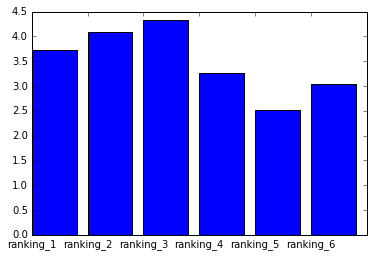

In [26]:
N = 6
ind = np.arange(N)  # the x locations for the groups

 
fig, ax = plt.subplots()
rects1 = ax.bar(ind, list(means.values))
ax.set_xticklabels(list(means.index))

#### Finding: "Star Wars: Episode V The Empire Strikes Back" has the best (lowest) ranking

### Find sum of people who have seen each film

In [29]:
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [32]:
num_seen = star_wars[star_wars.columns[3:9]].apply(np.sum)

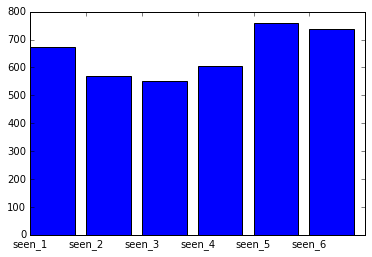

In [35]:
N = 6
ind = np.arange(N)  # the x locations for the groups
 
fig, ax = plt.subplots()
rects1 = ax.bar(ind, list(num_seen.values))
ax.set_xticklabels(list(num_seen.index))

#### Finding: it seems that the sum of people who have seen each film is indirectly  correlated with the rank (aka lower rakings (better movie) have higher # viewers).  This may be a causative effect.

#### In other words, more people have seen the older movies, which are also the more popular movies

In [37]:
star_wars.corr()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
RespondentID,1.000000,0.085264,0.071518,0.125047,0.115280,0.096706,0.073702,0.081299,0.115950,0.012867,-0.005917,-0.079068,-0.005253,-0.028552
Have you seen any of the 6 films in the Star Wars franchise?,0.085264,1.000000,0.591944,0.497981,0.480601,0.529160,0.687772,0.663317,NaN,NaN,NaN,NaN,NaN,NaN
seen_1,0.071518,0.591944,1.000000,0.783358,0.729996,0.665818,0.648044,0.653696,0.067218,0.013792,-0.067711,-0.146503,0.066301,0.079381
seen_2,0.125047,0.497981,0.783358,1.000000,0.883886,0.687882,0.611608,0.642843,0.246639,0.041711,-0.102122,-0.160216,-0.014686,-0.002038
seen_3,0.115280,0.480601,0.729996,0.883886,1.000000,0.698517,0.617805,0.651306,0.308085,0.134838,-0.181001,-0.147843,-0.049921,-0.053451
seen_4,0.096706,0.529160,0.665818,0.687882,0.698517,1.000000,0.734259,0.759477,0.440301,0.365598,0.174842,-0.554932,-0.136834,-0.143364
seen_5,0.073702,0.687772,0.648044,0.611608,0.617805,0.734259,1.000000,0.910124,0.385813,0.388224,0.248817,-0.130101,-0.422226,-0.368499
seen_6,0.081299,0.663317,0.653696,0.642843,0.651306,0.759477,0.910124,1.000000,0.431521,0.391197,0.237803,-0.159497,-0.272718,-0.509609
ranking_1,0.115950,NaN,0.067218,0.246639,0.308085,0.440301,0.385813,0.431521,1.000000,0.415511,0.066760,-0.451862,-0.454098,-0.462642
ranking_2,0.012867,NaN,0.013792,0.041711,0.134838,0.365598,0.388224,0.391197,0.415511,1.000000,0.336002,-0.435664,-0.528662,-0.532254


### Rankings by gender

In [41]:
star_wars["Gender"].describe()

count       1046
unique         2
top       Female
freq         549
Name: Gender, dtype: object

In [43]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

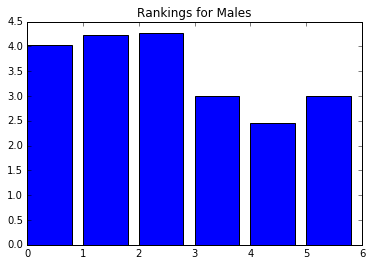

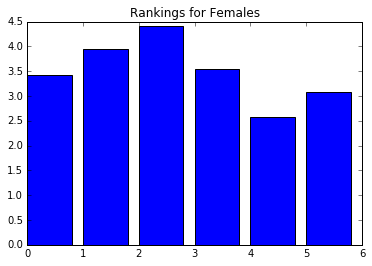

In [47]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.title('Rankings for Males')
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.title('Rankings for Females')
plt.show()

### View Counts by Gender

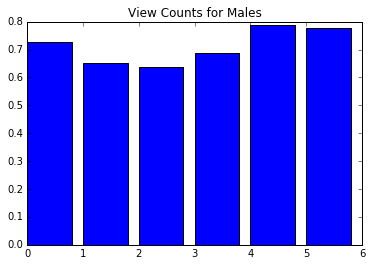

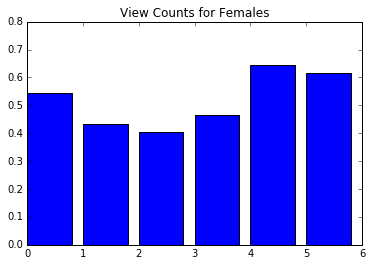

In [52]:
plt.bar(range(6), males[males.columns[3:9]].mean())
plt.title('View Counts for Males')
plt.ylim(0,0.8)
plt.show()

plt.bar(range(6), females[females.columns[3:9]].mean())
plt.title('View Counts for Females')
# Set same y limit for comparison's sake
plt.ylim(0,0.8)
plt.show()

#### Finding: across all films, more of the males have seen the movies

Next steps:

* Try to segment the data based on columns like Education, Location (Census Region), and "Which character shot first?", which aren't binary. Are they any interesting patterns?
Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
Which character do respondents like the most?
Which character do respondents dislike the most?
Which character is the most controversial (split between likes and dislikes)?